In [1]:
import numpy as np
from scipy.signal import butter,lfilter
import matplotlib.pyplot as plt
# Filter requirements.

fs = 30.0       # sample rate, Hz
cutoff = 0.05      # desired cutoff frequency of the filter, Hz
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

NameError: name 'T' is not defined

In [ ]:
rng = np.random.default_rng(seed=0)

mean = 0
std = 1 
num_samples = 10000
samples = rng.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    filt = butter(order, normal_cutoff, btype='low', analog=False, output='sos')
    y = sosfiltfilt(filt, data)
    return y

NameError: name 'butter_lowpass_filter' is not defined

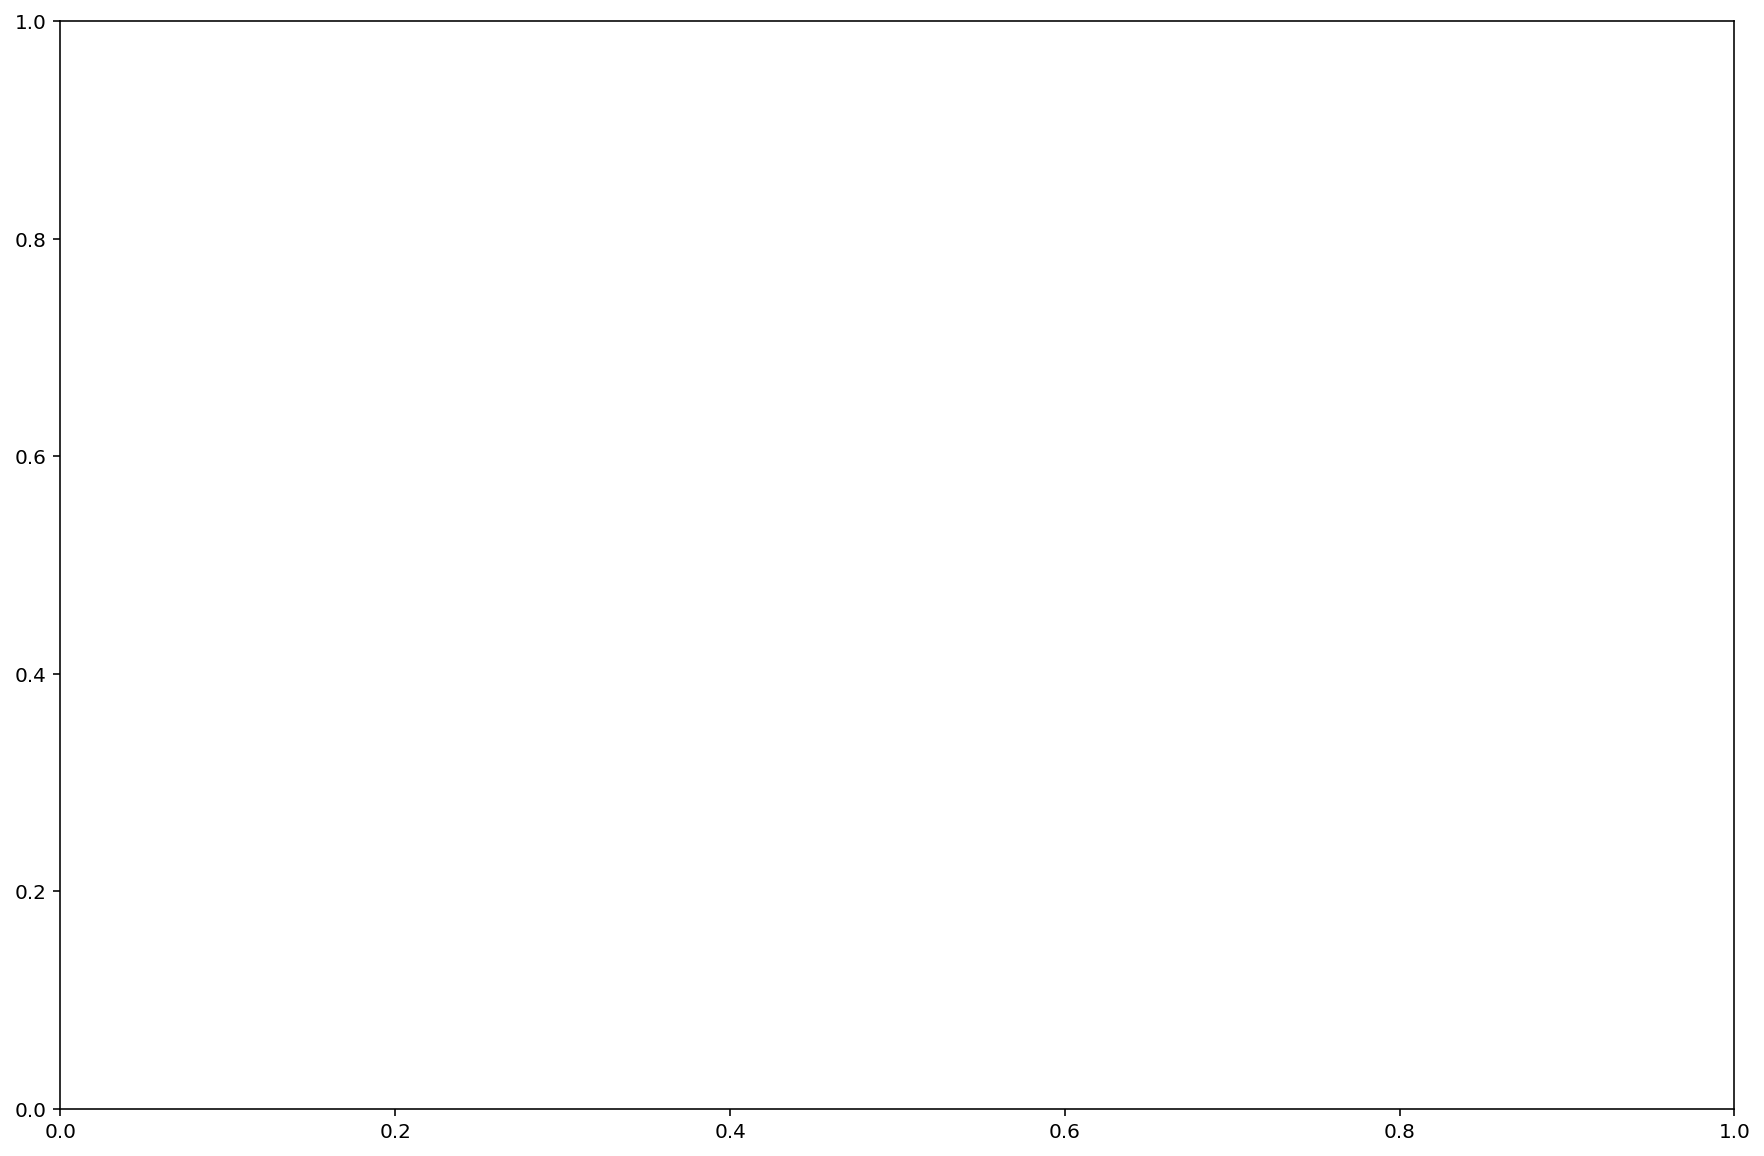

In [2]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(butter_lowpass_filter(samples, fs=fs, order=order, cutoff=cutoff));